# Home Exam
## BAN427: Insurance Analytics

### Import libraries:

In [7]:
# Modules
import pandas as pd
import os
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

### Importing excel data

In [8]:
# Import data from excel to raw_df
raw_df = pd.read_excel("exam_case_data.xlsx")



Adding columns for full churn, partial churn and more sale

In [9]:

# Adding new columns
raw_df['FULL_CHURN']    = np.where(raw_df['TIME2'] != 2, 1, 0)
raw_df['PARTIAL_CHURN'] = np.where((raw_df['NUMBER_COVERS_TIME2'] - raw_df['NUMBER_COVERS_TIME1']) < 0, 1, 0)
raw_df['MORE_SALE']     = np.where((raw_df['NUMBER_COVERS_TIME2'] - raw_df['NUMBER_COVERS_TIME1']) > 0, 1, 0)


################ Clean data errors in tenure difference #############

df = raw_df[(raw_df['TENURE_TIME2'] - raw_df['TENURE_TIME1'] == 0.5) | (raw_df['TIME2']).isnull()]
df.loc[:,'NUMBER_COVERS_TIME2'] = df.loc[:,'NUMBER_COVERS_TIME2'].fillna(0)
df.loc[:,'TOTAL_PREM_TIME2']    = df.loc[:,'TOTAL_PREM_TIME2'].fillna(0)

## Descriptive Statistics

In [10]:
########################### Descriptive statistics ------------------------------------------------------------------------------------------------------------------------------
df = pd.DataFrame(df)
df.FULL_CHURN.astype('category').describe()
df.PARTIAL_CHURN.astype('category').describe()
df.MORE_SALE.astype('category').describe()




def age_groups(x):
    """'
    Function that outputs  a string denoting an agegroup depending on
    the input integer. 
    """
    if   x < 30:
        return '<30'
    elif x < 40:
        return '<40'
    elif x < 50:
        return '<50'
    elif x < 60:
        return '<60'
    elif x < 70:
        return '<70'
    else:
        return '>=70'

df['AGE_GROUP'] = df['AGE'].apply(age_groups)


### Tables

In [11]:

################################### TABLES ##############################

pd.set_option('colheader_justify', 'center')   # FOR TABLE <th>

html_string = '''
<html>
  <head><title>HTML Pandas Dataframe with CSS</title></head>
  <link rel="stylesheet" type="text/css" href="style.css"/>
  <body>
    {table}
  </body>
</html>.
'''

def write_table_without_style(df, filename):
    """ Writes a table to html"""
    with open('table_outputs/'+filename+ '.html', 'w') as f:
        f.write(html_string.format(table=df.to_html(classes='mystyle')))

def write_table(styler, filename):
    s = styler.set_table_attributes('class = "mystyle"')
    with open('table_outputs/'+filename+ '.html', 'w') as f:
        f.write(html_string.format(table=s.to_html()))

### Age table ######

#age_table = df.groupby(by=["AGE_GROUP"]).describe().loc[:,['FULL_CHURN','PARTIAL_CHURN', "MORE_SALE"]]

#write_table(age_table.style, "table_age")

# Binary variables table

format_table_dict = {'Percentage': '{:.2%}'}
table_binary = pd.DataFrame([[(df['WOMAN']).count(), (df.loc[df['WOMAN'] == 1, 'WOMAN']).count()/(df['WOMAN']).count()],
                     [(df.loc[df['FULL_CHURN'] == 1, 'FULL_CHURN']).count(), (df.loc[df['FULL_CHURN'] == 1, 'FULL_CHURN']).count()/len(df)],
                     [(df.loc[df['PARTIAL_CHURN'] == 1, 'PARTIAL_CHURN']).count(), (df.loc[df['PARTIAL_CHURN'] == 1, 'PARTIAL_CHURN']).count()/len(df)],
                     [(df.loc[df['MORE_SALE'] == 1, 'MORE_SALE']).count(), (df.loc[df['MORE_SALE'] == 1, 'MORE_SALE']).count()/len(df)]],
                     index = ['Female (Positive)', 'Full churn (Positive)', 'Partial churn (Positive)', 'More sales (Positive)'],
                     columns = ["Count", "Percentage"])

styler_binary = table_binary.style.format(format_table_dict)

write_table(styler_binary, "table_binary")


In [12]:
## Number of covers table



table_continous = pd.DataFrame({'Age':(df['AGE']).describe()[1:,],
                                'Tenure time 1':(df['TENURE_TIME1']).describe()[1:,], 
                                'Tenure time 2':(df['TENURE_TIME2']).describe()[1:,], 
                                'Number of Covers in period 1': (df['NUMBER_COVERS_TIME1']).describe()[1:,],
                                'Number of Covers in period 2': (df['NUMBER_COVERS_TIME2']).describe()[1:,]})


write_table(table_continous.style.format('{:.2f}'), "table_continous")

In [13]:
##  Churn and more sales by the size of portfolio. 


df['PREMIUM_INCREASE'] = np.where((df['TOTAL_PREM_TIME2'] - df['TOTAL_PREM_TIME1']) > 0, 1, 0)

df.groupby(by=["PREMIUM_INCREASE"]).describe().loc[:,['FULL_CHURN','PARTIAL_CHURN', "MORE_SALE"]]


(df['TOTAL_PREM_TIME2'] - df['TOTAL_PREM_TIME1']).describe()


count    62062.000000
mean      -174.779624
std       1785.179080
min     -38876.000000
25%          0.000000
50%          0.000000
75%        190.000000
max      18977.000000
dtype: float64

In [14]:
##  Churn and more sales by whether customers has filed a claim
df.groupby(by=['CLAIM_EVENT_BEFORE_TIME1']).describe().loc[:,['FULL_CHURN','PARTIAL_CHURN', "MORE_SALE"]]


df.groupby(by=['AGE_GROUP', 'WOMAN']).describe().loc[:,['FULL_CHURN','PARTIAL_CHURN', "MORE_SALE"]]


df.groupby(by=['WOMAN', 'AGE_GROUP']).describe().loc[:,['FULL_CHURN','PARTIAL_CHURN', "MORE_SALE"]]


FULL_CHURN                                               \
                  count       mean      std    min  25%  50%  75%  max    
WOMAN AGE_GROUP                                                           
0     <30         2311.0    0.197317  0.398060  0.0  0.0  0.0  0.0  1.0   
      <40         5468.0    0.101317  0.301775  0.0  0.0  0.0  0.0  1.0   
      <50         7604.0    0.070095  0.255323  0.0  0.0  0.0  0.0  1.0   
      <60         8111.0    0.066823  0.249730  0.0  0.0  0.0  0.0  1.0   
      <70         6926.0    0.063962  0.244703  0.0  0.0  0.0  0.0  1.0   
      >=70        6599.0    0.056675  0.231239  0.0  0.0  0.0  0.0  1.0   
1     <30         1834.0    0.135224  0.342055  0.0  0.0  0.0  0.0  1.0   
      <40         3585.0    0.080056  0.271417  0.0  0.0  0.0  0.0  1.0   
      <50         5091.0    0.052249  0.222551  0.0  0.0  0.0  0.0  1.0   
      <60         5329.0    0.043348  0.203658  0.0  0.0  0.0  0.0  1.0   
      <70         4195.0    0.045054  0.207447  0.0  0.0  0.0  0.0  1.0   
      >=70        5009.0    0.053504  0.225058  0.0  0.0  0.0  0.0  1.0   

                PARTIAL_CHURN            ...           MORE_SALE            \
                    count        mean    ... 75%  max    count      mean     
WOMAN AGE_GROUP                          ...                                 
0     <30           2311.0     0.101688  ...  0.0  1.0   2311.0   0.088273   
      <40           5468.0     0.127469  ...  0.0  1.0   5468.0   0.112655   
      <50           7604.0     0.145844  ...  0.0  1.0   7604.0   0.117175   
      <60           8111.0     0.158673  ...  0.0  1.0   8111.0   0.108988   
      <70           6926.0     0.149293  ...  0.0  1.0   6926.0   0.089373   
      >=70          6599.0     0.125625  ...  0.0  1.0   6599.0   0.056524   
1     <30           1834.0     0.094875  ...  0.0  1.0   1834.0   0.085060   
      <40           3585.0     0.115202  ...  0.0  1.0   3585.0   0.090098   
      <50           5091.0     0.141426  ...  0.0  1.0   5091.0   0.111962   
      <60           5329.0     0.139238  ...  0.0  1.0   5329.0   0.087821   
      <70           4195.0     0.117759  ...  0.0  1.0   4195.0   0.055066   
      >=70          5009.0     0.085446  ...  0.0  1.0   5009.0   0.030345   

                                                    
                   std    min  25%  50%  75%  max   
WOMAN AGE_GROUP                                     
0     <30        0.283754  0.0  0.0  0.0  0.0  1.0  
      <40        0.316200  0.0  0.0  0.0  0.0  1.0  
      <50        0.321650  0.0  0.0  0.0  0.0  1.0  
      <60        0.311643  0.0  0.0  0.0  0.0  1.0  
      <70        0.285303  0.0  0.0  0.0  0.0  1.0  
      >=70       0.230948  0.0  0.0  0.0  0.0  1.0  
1     <30        0.279047  0.0  0.0  0.0  0.0  1.0  
      <40        0.286362  0.0  0.0  0.0  0.0  1.0  
      <50        0.315351  0.0  0.0  0.0  0.0  1.0  
      <60        0.283061  0.0  0.0  0.0  0.0  1.0  
      <70        0.228135  0.0  0.0  0.0  0.0  1.0  
      >=70       0.171553  0.0  0.0  0.0  0.0  1.0  

[12 rows x 24 columns]

## Plots

In [15]:
sns.set_theme(palette='pastel')
def bar_plot(df, x_var, hue_var, y_var, label_title, x_label, y_label, x_axis_label, y_axis_label):
    """
    Generates a bar plot with hue.
    
    Parameters:
        df: input dataframeø7609
        x_var : x variable
        hue_var: category variable. Is left out if empty string "". 
        y_var: y variable
        label_title: Title of categories
        x_label:

    """ 
    if hue_var == "":
        ax = sns.barplot(data = df,
                x = x_var, 
                y = y_var)
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
    else: 
        ax = sns.barplot(data = df,
                    x = x_var, 
                    y = y_var, 
                    hue = hue_var)
        ax.set_ylabel(y_axis_label)
        ax.set_xlabel(x_axis_label)
        labels = [x_label, y_label]
        h, l = ax.get_legend_handles_labels()
        ax.legend(h, labels, title = label_title)
    return ax


<AxesSubplot:xlabel='Age Group', ylabel='Number of full churners'>

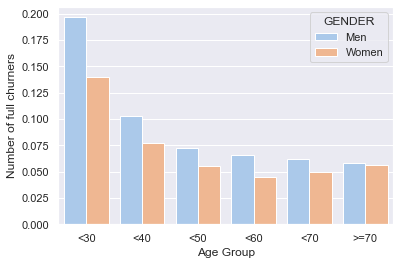

In [16]:
# FULL CHURNERS
hist_df_full_churn_no_claim = df.loc[df.CLAIM_EVENT_BEFORE_TIME1 == 0,['FULL_CHURN','AGE_GROUP', 'WOMAN']].groupby(by = ["AGE_GROUP", 'WOMAN']).mean()
hist_df_full_churn_no_claim.index.name = 'AGE_GROUP'
hist_df_full_churn_no_claim.reset_index(inplace=True)

bar_plot(hist_df_full_churn_no_claim, "AGE_GROUP", 'WOMAN', 'FULL_CHURN', 'GENDER', 'Men', 'Women', 'Age Group', 'Number of full churners')

<AxesSubplot:xlabel='Claim Event', ylabel='Number of full churners given filed claim'>

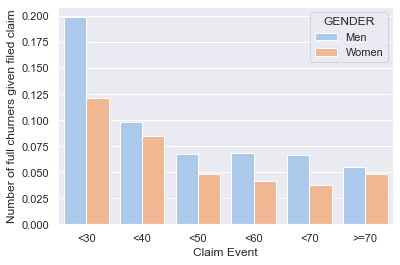

In [ ]:
# FULL CHURNERS given claim
hist_df_full_churn_given_claim = df.loc[df.CLAIM_EVENT_BEFORE_TIME1 == 1,['FULL_CHURN','AGE_GROUP', 'WOMAN']].groupby(by = ["AGE_GROUP", 'WOMAN']).mean()
hist_df_full_churn_given_claim.index.name = 'AGE_GROUP'
hist_df_full_churn_given_claim.reset_index(inplace=True)

bar_plot(hist_df_full_churn_given_claim, "AGE_GROUP", 'WOMAN', 'FULL_CHURN', 'GENDER', 'Men', 'Women', 'Claim Event', 'Number of full churners given filed claim' )


<AxesSubplot:xlabel='Claim Event', ylabel='Number of full churners'>

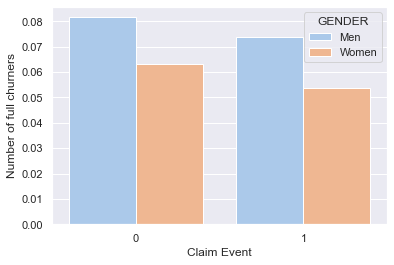

In [ ]:
# FULL CHURN by claim event 
hist_df_full_claim_event = df.loc[:,['FULL_CHURN','CLAIM_EVENT_BEFORE_TIME1', 'WOMAN']].groupby(by = ['CLAIM_EVENT_BEFORE_TIME1', 'WOMAN']).mean()
hist_df_full_claim_event.index.name = 'CLAIM_EVENT_BEFORE_TIME1'
hist_df_full_claim_event.reset_index(inplace=True)

bar_plot(hist_df_full_claim_event, "CLAIM_EVENT_BEFORE_TIME1", 'WOMAN', 'FULL_CHURN', 'GENDER', 'Men', 'Women', 'Claim Event', 'Number of full churners' )


<AxesSubplot:xlabel='Age Group', ylabel='Number of partial churners'>

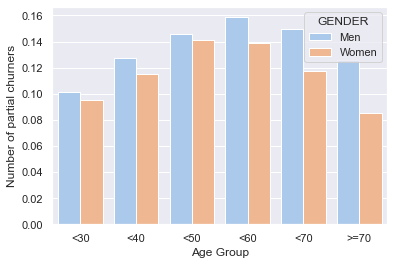

In [ ]:
# PARTIAL CHURNERS
hist_df_partial_churn = df.loc[:,['PARTIAL_CHURN','AGE_GROUP', 'WOMAN']].groupby(by = ["AGE_GROUP", 'WOMAN']).mean()
hist_df_partial_churn.index.name = 'AGE_GROUP'
hist_df_partial_churn.reset_index(inplace=True)

# Partial plot
bar_plot(hist_df_partial_churn, "AGE_GROUP", 'WOMAN', 'PARTIAL_CHURN', 'GENDER', 'Men', 'Women', 'Age Group', 'Number of partial churners' )


<AxesSubplot:xlabel='Age Group', ylabel='Number of increase in coverage'>

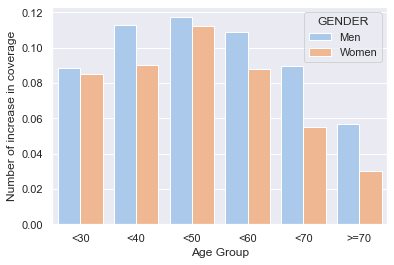

In [ ]:
# MORE SALE
hist_df_more_sale = df.loc[:,['MORE_SALE','AGE_GROUP', 'WOMAN']].groupby(by = ["AGE_GROUP", 'WOMAN']).mean()
hist_df_more_sale.index.name = 'AGE_GROUP'
hist_df_more_sale.reset_index(inplace=True)

# More sales plot
bar_plot(hist_df_more_sale, "AGE_GROUP", 'WOMAN', 'MORE_SALE', 'GENDER', 'Men', 'Women', 'Age Group', 'Number of increase in coverage' )


<AxesSubplot:xlabel='Age Group', ylabel='Number of increase in coverage'>

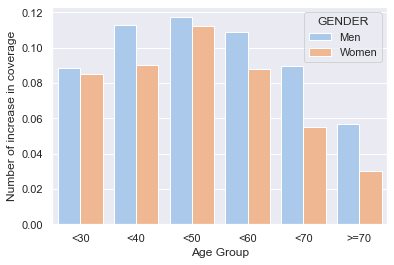

In [22]:
# MORE SALE
hist_df_more_sale = df.loc[:,['MORE_SALE','AGE_GROUP', 'WOMAN']].groupby(by = ["AGE_GROUP", 'WOMAN']).mean()
hist_df_more_sale.index.name = 'AGE_GROUP'
hist_df_more_sale.reset_index(inplace=True)

# More sales plot
bar_plot(hist_df_more_sale, "AGE_GROUP", 'WOMAN', 'MORE_SALE', 'GENDER', 'Men', 'Women', 'Age Group', 'Number of increase in coverage' )



## Prediction Models

In [23]:

# Creating features and prediction variables
x   = df.loc[:, ~df.columns.isin(['TIME1', 'NUMBER_COVERS_TIME2', 'PREMIUM_INCREASE', 'TIME2', 'TOTAL_PREM_TIME2', 'AVERAGE_INCOME_COUNTY_TIME1','TENURE_TIME2','FULL_CHURN', 'PARTIAL_CHURN', 'MORE_SALE'])]


## One hot encoding age group feature
one_hot_encoder = OneHotEncoder(handle_unknown= 'ignore')

one_hot_encoder.fit(df[['AGE_GROUP']])

age_group_hot = one_hot_encoder.transform(df[['AGE_GROUP']]).toarray()
age_group_hot

age_group_hot_df = pd.DataFrame(age_group_hot)
age_group_hot_df.columns = one_hot_encoder.get_feature_names()

# Concat into x
x = pd.concat([x.reset_index(drop=True), age_group_hot_df], axis=1)
x = x.loc[:, x.columns != 'AGE_GROUP'] # Remove string AGE_GROUP

# Check for NaN
x[x.isna().any(axis=1)]


y_full_churn    = df['FULL_CHURN']
y_partial_churn = df['PARTIAL_CHURN']
y_more_sale     = df['MORE_SALE']



def variable_importance(model):
    """"
    Function that takes a fitted model and enumerates its features' importance.
    Prints a barplot
    parameters:
        @model: fitted model
    """
    importance = model.coef_[0]
    for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
    
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    

#ROC-curve function
def roc(ytrain, x_train, ytest, x_test, model):
    """
    Function that draws a ROC curve based o
    Parameters:
        @ytrain: target feature training set
        @x_train: features training set
        @y_test: target feature test set
        @x_test: features test set
        @model: a fitted model
    """
    fit_proba = model.predict_proba(x_train)
    yprob_pred = model.predict_proba(x_test)

    fpr, tpr, tr = metrics.roc_curve(ytest, yprob_pred[:,1])
    auc = metrics.roc_auc_score(ytest, yprob_pred[:, 1])

    fpr1, tpr1, tr = metrics.roc_curve(ytrain, fit_proba[:,1])
    auc1 = metrics.roc_auc_score(ytrain, fit_proba[:,1])

    plt.figure(num = None, figsize = (10,10), dpi = 80)

    plt.plot((1,0), (1,0), ls = "--", c = ".3")
    plt.title = (' ROC Curve - test and train data')
    plt.xlabel('False positive rate')
    plt.plot(fpr, tpr, label = '{} test data (area = {:.2f})'.format(model, auc))
    plt.plot(fpr1, tpr1, label = '{} train data (area = {:.2f})'.format(model, auc1))
    plt.ylabel('True positive rate')
    plt.legend()
    plt.show()
    return plt



In [24]:
# Splitting the data into train and test [fc = full churn, pc = partial churn, ms = more sales]

xtrain_fc, xtest_fc, ytrain_fc, ytest_fc = train_test_split(x, y_full_churn,    test_size = 0.2, random_state = 0)
xtrain_pc, xtest_pc, ytrain_pc, ytest_pc = train_test_split(x, y_partial_churn, test_size = 0.2, random_state = 0)
xtrain_ms, xtest_ms, ytrain_ms, ytest_ms = train_test_split(x, y_more_sale,     test_size = 0.2, random_state = 0)

In [25]:
# Scaling the features

sc = StandardScaler()

xtrain_fc = sc.fit_transform(xtrain_fc)
xtest_fc  = sc.transform(xtest_fc)

xtrain_pc = sc.fit_transform(xtrain_pc)
xtest_pc  = sc.transform(xtest_pc)

xtrain_ms = sc.fit_transform(xtrain_ms)
xtest_ms  = sc.transform(xtest_ms)


# Check for Nan
#np.any(np.isnan(xtrain_fc))
#np.any(np.isfinite(xtrain_fc))


### Training the logistic regression model

In [26]:


logreg_fc = LogisticRegression(random_state = 0)
logreg_fc.fit(xtrain_fc, ytrain_fc)

logreg_pc = LogisticRegression(random_state = 0)
logreg_pc.fit(xtrain_pc, ytrain_pc)

logreg_ms = LogisticRegression(random_state = 0)
logreg_ms.fit(xtrain_ms, ytrain_ms)


LogisticRegression(random_state=0)

In [104]:
# Predicting the logreg model
ypred_logreg_fc = logreg_fc.predict(xtest_fc)
yprob_logreg_fc = (logreg_fc.predict_proba(xtest_fc)[:,1]  >= 0.121980).astype(bool)

ypred_logreg_pc = logreg_pc.predict(xtest_pc)
yprob_logreg_pc = (logreg_pc.predict_proba(xtest_pc)[:,1]  >= 0.05).astype(bool)

ypred_logreg_ms = logreg_ms.predict(xtest_ms)
yprob_logreg_ms = (logreg_pc.predict_proba(xtest_ms)[:,1]  >= 0.05).astype(bool)



Feature: 0, Score: -0.39742
Feature: 1, Score: 0.28328
Feature: 2, Score: -0.19321
Feature: 3, Score: -0.54978
Feature: 4, Score: 0.31932
Feature: 5, Score: 0.08064
Feature: 6, Score: -0.18965
Feature: 7, Score: 0.08006
Feature: 8, Score: -0.16694
Feature: 9, Score: 0.10476
Feature: 10, Score: -0.18109
Feature: 11, Score: 0.25441
Feature: 12, Score: 0.17188
Feature: 13, Score: 0.03359
Feature: 14, Score: -0.05086
Feature: 15, Score: -0.09762
Feature: 16, Score: -0.20363


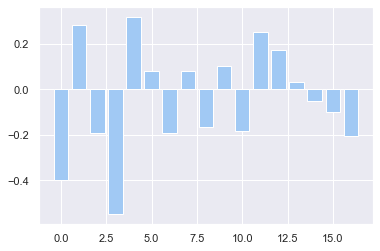

[[4707 6835]
 [ 182  689]]
[[4402 6349]
 [ 130 1532]]
[[4296 6996]
 [ 236  885]]


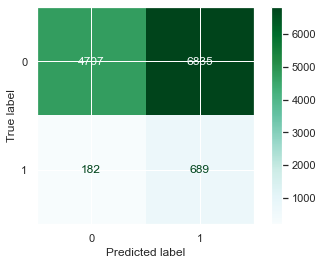

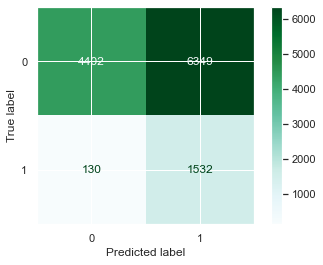

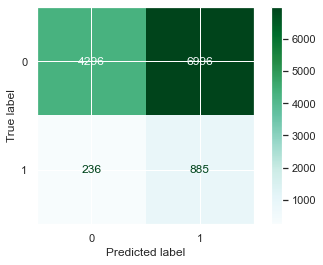

In [28]:
# Variable importance  
#FC 
variable_importance(logreg_fc)

cm_fc = confusion_matrix(ytest_fc, yprob_logreg_fc)
print(cm_fc)
accuracy_score(ytest_fc, yprob_logreg_fc)
cmd_fc = ConfusionMatrixDisplay(cm_fc, display_labels=['0','1'])
cmd_fc.plot(cmap='BuGn')

cm_pc = confusion_matrix(ytest_pc, yprob_logreg_pc)
print(cm_pc)
accuracy_score(ytest_pc, yprob_logreg_pc)
cmd_pc = ConfusionMatrixDisplay(cm_pc, display_labels=['0','1'])
cmd_pc.plot(cmap='BuGn')

cm_ms = confusion_matrix(ytest_ms, yprob_logreg_ms)
print(cm_ms)
accuracy_score(ytest_ms, yprob_logreg_ms)
cmd_ms = ConfusionMatrixDisplay(cm_ms, display_labels=['0','1'])
cmd_ms.plot(cmap='BuGn')

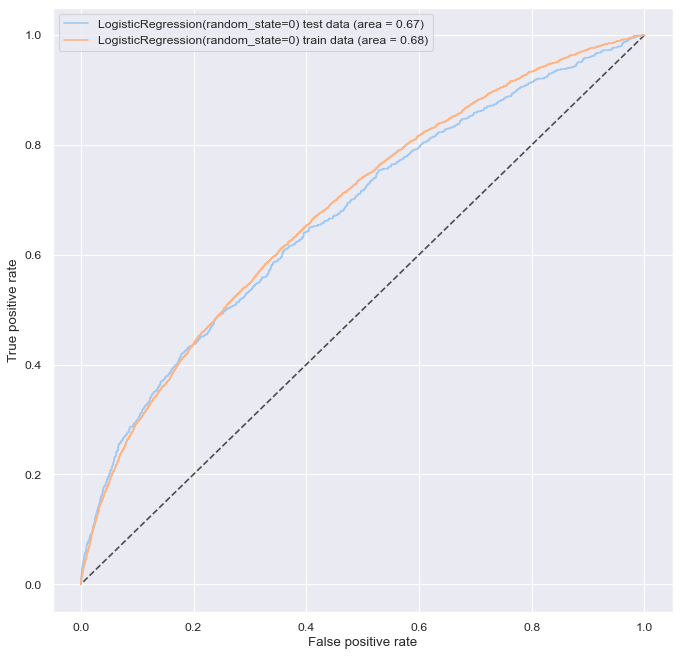

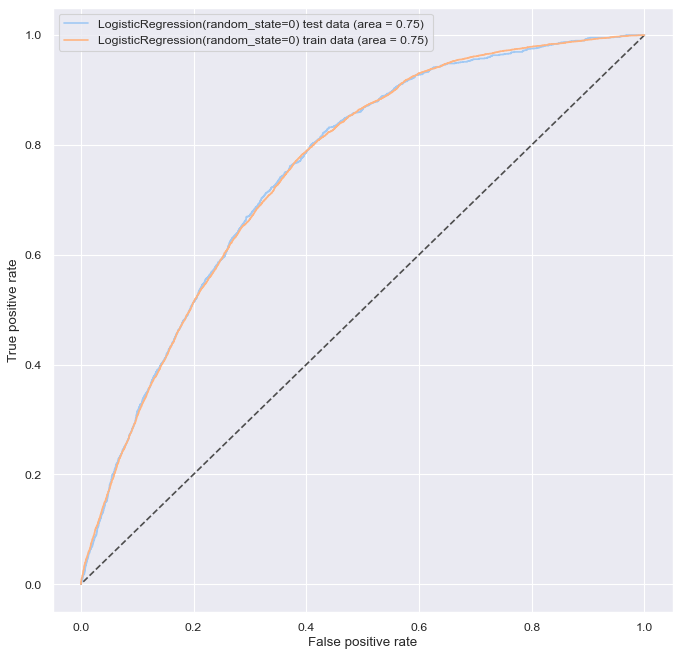

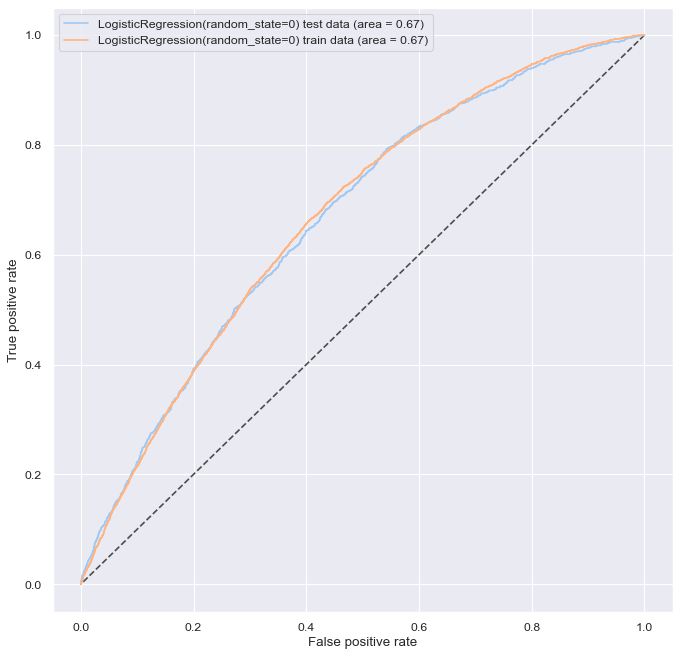

<module 'matplotlib.pyplot' from 'C:\\Users\\sondr\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
# ROC curve logreg y

roc_logreg_fc = roc(ytrain_fc, xtrain_fc, ytest_fc, xtest_fc, logreg_fc)
roc_logreg_fc

roc_logreg_pc = roc(ytrain_pc, xtrain_pc, ytest_pc, xtest_pc, logreg_pc)
roc_logreg_pc

roc_logreg_ms = roc(ytrain_ms, xtrain_ms, ytest_ms, xtest_ms, logreg_ms)
roc_logreg_ms

### Training the KNN-model

In [29]:

knn_fc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_fc.fit(xtrain_fc, ytrain_fc)

knn_pc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_pc.fit(xtrain_pc, ytrain_pc)

knn_ms = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_ms.fit(xtrain_ms, ytrain_ms)

# Predicting the knn models
ypred_knn_fc = knn_fc.predict(xtest_fc)

ypred_knn_pc = knn_pc.predict(xtest_pc)

ypred_knn_ms = knn_ms.predict(xtest_ms)


[[11435   107]
 [  846    25]]
RECALL KNN: 0.923
RECALL KNN: 0.029
[[10341   410]
 [ 1483   179]]
[[11152   140]
 [ 1100    21]]


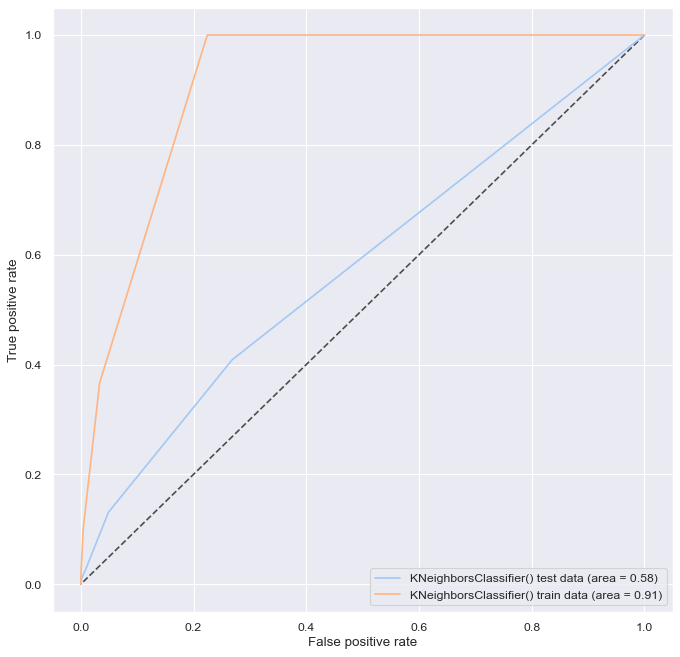

<module 'matplotlib.pyplot' from 'C:\\Users\\sondr\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [30]:
# Checking the accuracy with confusion matrix
cm_knn_fc = confusion_matrix(ytest_fc, ypred_knn_fc)
print(cm_knn_fc)
print('ACCURACY KNN: %.3f' % accuracy_score(ytest_fc, ypred_knn_fc))
print('RECALL KNN: %.3f' % recall_score(ytest_fc, ypred_knn_fc))

tn, fp, fn, tp = confusion_matrix(ytest_fc, ypred_knn_fc).ravel()
(tn, fp, fn, tp)


cm_knn_pc = confusion_matrix(ytest_pc, ypred_knn_pc)
print(cm_knn_pc)
accuracy_score(ytest_pc, ypred_knn_pc)


cm_knn_ms = confusion_matrix(ytest_ms, ypred_knn_ms)
print(cm_knn_ms)
accuracy_score(ytest_ms, ypred_knn_ms)



### ROC-curve KNN ###

roc_KNN_fc = roc(ytrain_fc, xtrain_fc, ytest_fc, xtest_fc, knn_fc)
roc_KNN_fc


### Training the SVM-model

In [32]:


svc_fc = SVC(kernel = 'rbf', random_state = 0, probability = True)
svc_fc.fit(xtrain_fc, ytrain_fc)

svc_pc = SVC(kernel = 'rbf', random_state = 0, probability = True)
svc_pc.fit(xtrain_pc, ytrain_pc)

svc_ms = SVC(kernel = 'rbf', random_state = 0, probability = True)
svc_ms.fit(xtrain_ms, ytrain_ms)

# Predicting the svm model
ypred_svc_fc = (svc_fc.predict_proba(xtest_fc)[:,1]  >= 0.05).astype(bool)
ypred_svc_pc = (svc_pc.predict_proba(xtest_pc)[:,1]  >= 0.05).astype(bool)
ypred_svc_ms = (svc_ms.predict_proba(xtest_ms)[:,1]  >= 0.05).astype(bool)

KeyboardInterrupt: 

In [ ]:
# Predicting the svm model
ypred_svc_fc = (svc_fc.predict_proba(xtest_fc)[:,1]  >= 0.05).astype(bool)
ypred_svc_pc = (svc_pc.predict_proba(xtest_pc)[:,1]  >= 0.05).astype(bool)
ypred_svc_ms = (svc_ms.predict_proba(xtest_ms)[:,1]  >= 0.05).astype(bool)

# Checking the accuracy with confusion matrix
cm_svc_fc = confusion_matrix(ytest_fc, ypred_svc_fc)
print(cm_svc_fc)
accuracy_score(ytest_fc, ypred_svc_fc)

cm_svc_pc = confusion_matrix(ytest_pc, ypred_svc_pc)
print(cm_svc_pc)
accuracy_score(ytest_pc, ypred_svc_pc)

cm_svc_ms = confusion_matrix(ytest_ms, ypred_svc_ms)
print(cm_svc_ms)
accuracy_score(ytest_ms, ypred_svc_ms)


[[    0 11542]
 [    0   871]]
[[    0 10751]
 [    0  1662]]
[[    0 11292]
 [    0  1121]]


0.09030854749053412

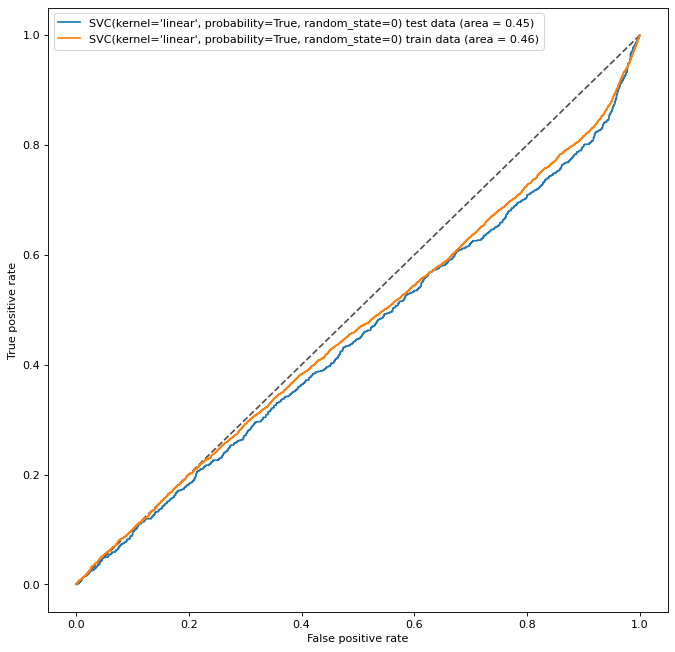

TypeError: roc() missing 2 required positional arguments: 'x_test' and 'model'

In [ ]:
#ROC Curve SVM
roc_SVM_fc = roc(ytrain_fc, xtrain_fc, ytest_fc, xtest_fc, svc_fc)
roc_SVM_fc

roc_SVM_pc = roc(ytrain_pc, ytest_pc, ypred_svc_pc)
roc_SVM_pc

roc_SVM_ms = roc(ytrain_ms, ytest_ms, ypred_svc_ms)
roc_SVM_ms


In [35]:
#Training the Naive bayes-model

nb_fc = GaussianNB()
nb_fc.fit(xtrain_fc, ytrain_fc)


ypred_nb_fc = (nb_fc.predict_proba(xtest_fc)[:,1]  >= 0.05).astype(bool)
print('RECALL NB: %.3f' % recall_score(ytest_fc, ypred_nb_fc))


RECALL NB: 0.634


### SVM-model with 'AVERAGE_INCOME_COUNTY_TIME1

In [34]:
df_avg_income   = df.loc[:, ~df.columns.isin(['TIME1', 'NUMBER_COVERS_TIME2','PREMIUM_INCREASE', 'TIME2', 'TOTAL_PREM_TIME2', 'TENURE_TIME2', 'PARTIAL_CHURN', 'MORE_SALE'])]
df_avg_income = pd.concat([df_avg_income.reset_index(drop=True), age_group_hot_df], axis=1)
df_avg_income = (df_avg_income[df_avg_income['AVERAGE_INCOME_COUNTY_TIME1'].notnull()]).loc[:, df_avg_income.columns != 'AGE_GROUP']

In [ ]:
df_avg_income   = df.loc[:, ~df.columns.isin(['TIME1', 'NUMBER_COVERS_TIME2','PREMIUM_INCREASE', 'TIME2', 'TOTAL_PREM_TIME2', 'TENURE_TIME2', 'PARTIAL_CHURN', 'MORE_SALE'])]
df_avg_income = pd.concat([df_avg_income.reset_index(drop=True), age_group_hot_df], axis=1)
df_avg_income = (df_avg_income[df_avg_income['AVERAGE_INCOME_COUNTY_TIME1'].notnull()]).loc[:, df_avg_income.columns != 'AGE_GROUP']

x_avg_income = df_avg_income.loc[:, df_avg_income.columns != 'FULL_CHURN']
y_full_churn_avg_income   = df_avg_income['FULL_CHURN']

xtrain_avg_income, xtest_avg_income, ytrain_avg_income, ytest_avg_income = train_test_split(x_avg_income, y_full_churn_avg_income, test_size = 0.2, random_state = 0)

svc_fc = SVC(kernel = 'linear', random_state = 0, probability = True)
svc_fc.fit(xtrain_avg_income, ytrain_avg_income)

# Predicting the svm model
ypred_svc_avg_income = (svc_fc.predict_proba(xtest_avg_income)[:,1]  >= 0.05).astype(bool)

# Checking the accuracy with confusion matrix
cm_svc_avg_income = confusion_matrix(ytest_avg_income, ypred_svc_avg_income)
print(cm_svc_avg_income)
accuracy_score(ytest_avg_income, ypred_svc_avg_income)


In [37]:

svc_fc = SVC(kernel = 'linear', random_state = 0, probability = True)
svc_fc.fit(xtrain_avg_income, ytrain_avg_income)

# Predicting the svm model
ypred_svc_avg_income = (svc_fc.predict_proba(xtest_avg_income)[:,1]  >= 0.05).astype(bool)

# Checking the accuracy with confusion matrix
cm_svc_avg_income = confusion_matrix(ytest_avg_income, ypred_svc_avg_income)
print(cm_svc_avg_income)
accuracy_score(ytest_avg_income, ypred_svc_avg_income)


NameError: name 'xtrain_avg_income' is not defined

### LDA model

In [95]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

lda_fc = LinearDiscriminantAnalysis()

lda_fc.fit(xtrain_fc, ytrain_fc)

## Find parameters

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10, random_state = 1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(lda_fc, grid, scoring='roc_auc', cv=cv, n_jobs= 8)

#scores = cross_val_score(lda_fc, )

results = search.fit(xtrain_fc, ytrain_fc)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


#ypred_lda_fc = lda_fc.predict(xtest_fc)
ypred_lda_fc = (lda_fc.predict_proba(xtest_fc)[:,1]  >= 0.087912).astype(bool)
print(ypred_lda_fc)
print('RECALL: %.3f' % recall_score(ytest_fc, ypred_lda_fc))
recall_score(ytest_fc, ypred_lda_fc)

print("ACCURACY: %.3f" % accuracy_score(ytest_fc, ypred_lda_fc))

### Confusion matrix
cm_lda_fc = confusion_matrix(ytest_fc, ypred_lda_fc)
print(cm_lda_fc)



C:\Users\sondr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.67431642 0.67431642        nan]
  warnings.warn(


Mean Accuracy: 0.674
Config: {'solver': 'svd'}
[False False False ...  True  True False]
RECALL: 0.444
ACCURACY: 0.766
[[9122 2420]
 [ 484  387]]


### Traning the Random Forest model

In [39]:

rfc_fc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_fc = rfc_fc.fit(xtrain_fc, ytrain_fc)

# Prediction
ypred_rfc_fc = (rfc_fc.predict_proba(xtest_fc)[:,1] > 0).astype(bool)

# Accuracy
cm_rfc_fc = confusion_matrix(ytest_fc, ypred_rfc_fc)
print(cm_rfc_fc)
print('RECALL: %.3f' % recall_score(ytest_fc, ypred_rfc_fc))


[[7001 4541]
 [ 364  507]]
RECALL: 0.582


In [106]:
from numpy import sqrt, argmax, isnan



lda_treshold_preds = (lda_fc.predict_proba(xtest_fc))[:,1]
log_treshold_preds = logreg_fc.predict_proba(xtest_fc)[:,1]
print(np.isnan((sum(lda_treshold_preds))))

print(len(ytest_fc), "  ", len(log_treshold_preds))
precision, recall, thresholds = metrics.precision_recall_curve(ytest_fc, lda_treshold_preds)
#fpr, tpr, thresholds = metrics.roc_curve(ytest_fc, log_treshold_preds)
#gmeans = sqrt(tpr * (1-fpr))
#J = tpr-fpr



# convert to f score
#fscore = (2*precision*recall)/(precision + recall)
#fscore = fscore[~isnan(fscore)]
#print(fscore)

ix = argmax(recall)
print('Best Threshold=%f, fscore =%.3f' % (thresholds[ix], recall[ix]))


False
12413    12413
Best Threshold=0.009335, fscore =1.000
